In [43]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
#df=pd.read_csv(r'C:\Users\pnaik27\Anaconda\Algorithm\Linear Regression\DataSet\car data.csv')
df=pd.read_csv(r'C:\Users\Admin\Machine_Learning_Projects\Linear_Regression\Data\Car_Dekho\car data.csv')

In [5]:
df['Log_Kms_Driven']=np.log10(df['Kms_Driven'])

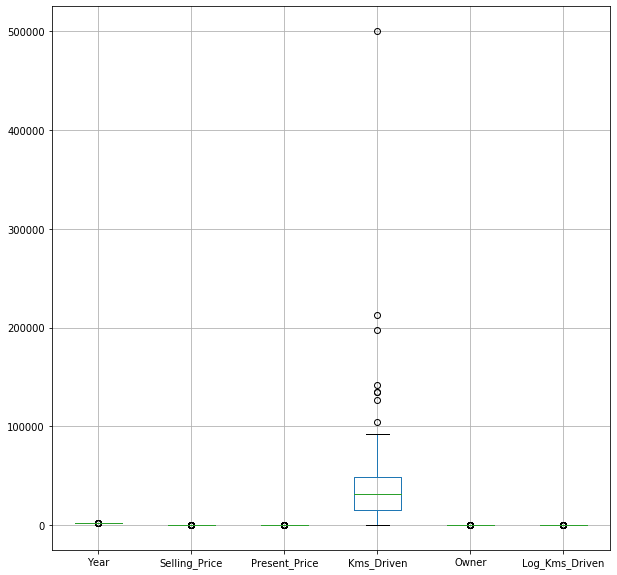

In [6]:
df.boxplot(figsize=(10,10))

In [7]:
df['Log_Kms_Driven']

0      4.431364
1      4.633468
2      3.838849
3      3.716003
4      4.627878
         ...   
296    4.531326
297    4.778151
298    4.944157
299    3.954243
300    3.737511
Name: Log_Kms_Driven, Length: 301, dtype: float64

In [8]:
df['Age']=2020-df['Year']

In [9]:
Final_df=df[['Selling_Price', 'Present_Price','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Log_Kms_Driven','Age']]
Final_df.head(3)

,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner,Log_Kms_Driven,Age
0,3.35,5.59,Petrol,Dealer,Manual,0,4.431364,6
1,4.75,9.54,Diesel,Dealer,Manual,0,4.633468,7
2,7.25,9.85,Petrol,Dealer,Manual,0,3.838849,3


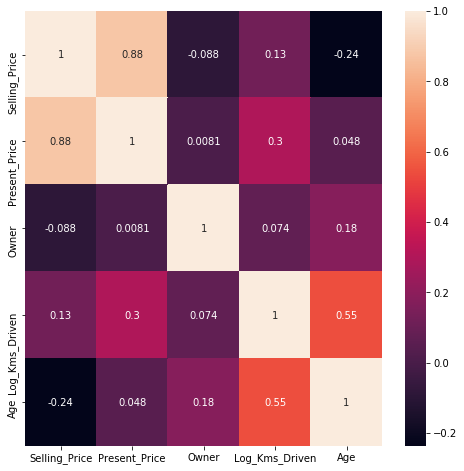

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(Final_df.corr(),annot=True)

In [11]:
Final_df.drop(columns='Owner',inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
Final_df

,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Log_Kms_Driven,Age
0,3.35,5.59,Petrol,Dealer,Manual,4.431364,6
1,4.75,9.54,Diesel,Dealer,Manual,4.633468,7
2,7.25,9.85,Petrol,Dealer,Manual,3.838849,3
3,2.85,4.15,Petrol,Dealer,Manual,3.716003,9
4,4.60,6.87,Diesel,Dealer,Manual,4.627878,6
...,...,...,...,...,...,...,...
296,9.50,11.60,Diesel,Dealer,Manual,4.531326,4
297,4.00,5.90,Petrol,Dealer,Manual,4.778151,5
298,3.35,11.00,Petrol,Dealer,Manual,4.944157,11
299,11.50,12.50,Diesel,Dealer,Manual,3.954243,3


In [13]:
Final_df=pd.get_dummies(Final_df,drop_first=True)

In [14]:
scaler=StandardScaler()
var=['Present_Price','Log_Kms_Driven','Age']
Final_df[var]=scaler.fit_transform(Final_df[var])
Final_df.head(3)

,Selling_Price,Present_Price,Log_Kms_Driven,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,-0.236215,0.083911,-0.128897,0,1,0,1
1,4.75,0.221505,0.543824,0.217514,1,0,0,1
2,7.25,0.257427,-1.264426,-1.168129,0,1,0,1


In [15]:
y=Final_df.iloc[:,0]
x=Final_df.iloc[:,1:]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=23)

In [17]:
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred=reg_model.predict(x_test)

In [19]:
reg_model.score(x_train,y_train)

0.8810572181019536

In [20]:
reg_model.score(x_test,y_test)

0.8706287447410501

In [21]:
import statsmodels.api as sm
model_1=sm.OLS(endog=y,exog=x).fit()
print(model_1.summary())

                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              572.7
Date:                Wed, 16 Dec 2020   Prob (F-statistic):                   3.31e-167
Time:                        19:37:00   Log-Likelihood:                         -604.21
No. Observations:                 301   AIC:                                      1222.
Df Residuals:                     294   BIC:                                      1248.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [22]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.2479425040537857
MSE: 4.334673947694565
RMSE: 2.081987979719039


In [23]:
Final_df_1=df[['Selling_Price', 'Present_Price','Fuel_Type', 'Seller_Type', 'Transmission','Age','Kms_Driven']]

In [24]:
Final_df_1

,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Age,Kms_Driven
0,3.35,5.59,Petrol,Dealer,Manual,6,27000
1,4.75,9.54,Diesel,Dealer,Manual,7,43000
2,7.25,9.85,Petrol,Dealer,Manual,3,6900
3,2.85,4.15,Petrol,Dealer,Manual,9,5200
4,4.60,6.87,Diesel,Dealer,Manual,6,42450
...,...,...,...,...,...,...,...
296,9.50,11.60,Diesel,Dealer,Manual,4,33988
297,4.00,5.90,Petrol,Dealer,Manual,5,60000
298,3.35,11.00,Petrol,Dealer,Manual,11,87934
299,11.50,12.50,Diesel,Dealer,Manual,3,9000


In [25]:
Final_df_1=pd.get_dummies(Final_df_1,drop_first=True)

In [26]:
Final_df_1.drop(columns=['Kms_Driven'],inplace=True)

In [27]:
Final_df_1.head()

,Selling_Price,Present_Price,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,6,0,1,0,1
1,4.75,9.54,7,1,0,0,1
2,7.25,9.85,3,0,1,0,1
3,2.85,4.15,9,0,1,0,1
4,4.60,6.87,6,1,0,0,1


In [28]:
scaler=StandardScaler()
var=['Present_Price','Age']
Final_df_1[var]=scaler.fit_transform(Final_df_1[var])
Final_df_1.head(3)

,Selling_Price,Present_Price,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,-0.236215,-0.128897,0,1,0,1
1,4.75,0.221505,0.217514,1,0,0,1
2,7.25,0.257427,-1.168129,0,1,0,1


In [29]:
y1=Final_df_1.iloc[:,0]
x1=Final_df_1.iloc[:,1:]

In [30]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=23)

In [31]:
reg_model_1=LinearRegression()
reg_model_1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
reg_model_1.score(x1_train,y1_train)

0.8806383144186946

In [33]:
reg_model_1.score(x1_test,y1_test)

0.8684783886444389

In [34]:
y1_pred=reg_model_1.predict(x1_test)

In [35]:
import statsmodels.api as sm
model_1=sm.OLS(endog=y1,exog=x1).fit()
print(model_1.summary())

                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              664.7
Date:                Wed, 16 Dec 2020   Prob (F-statistic):                   3.94e-168
Time:                        19:37:02   Log-Likelihood:                         -605.40
No. Observations:                 301   AIC:                                      1223.
Df Residuals:                     295   BIC:                                      1245.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [36]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y1_test, y1_pred))
print('MSE:', metrics.mean_squared_error(y1_test, y1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

MAE: 1.2677990171375986
MSE: 4.406723125323622
RMSE: 2.099219646755342


In [38]:
reg_model.predict([[-0.236215,0.083911,-0.128897,0,1,0,1]])


array([3.94427712])

In [40]:
reg_model.predict([[0.257427 ,-1.264426,-1.168129 ,0 ,1 ,0,1]])


array([7.11983624])

In [41]:
x.iloc[3]

Present_Price            -0.403079
Log_Kms_Driven           -1.543976
Age                       0.910335
Fuel_Type_Diesel          0.000000
Fuel_Type_Petrol          1.000000
Seller_Type_Individual    0.000000
Transmission_Manual       1.000000
Name: 3, dtype: float64

In [42]:
reg_model_1.predict([[0.257427,-1.168129,0,1,0,1]])

array([7.0154512])

In [44]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)
alpha = lasscv.alpha_
alpha

0.0018278227956733013

In [45]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0018278227956733013, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
lasso_reg.score(x_test, y_test)

0.8706019411453494

In [47]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([4.80645595, 0.15015678, 8.63251174, 3.91175774, 4.54188487,
       2.88691371, 4.78128757, 1.42097927, 7.49649445, 2.92276458,
       0.79657591, 3.41530001, 4.42965594, 3.19749243, 4.50736007,
       1.06581911, 4.5581876 , 2.04936579, 9.03897512, 9.77801287,
       0.83779191, 9.22999118, 4.28360038, 8.28376574, 0.03938204,
       5.42339229, 3.69088841, 6.80957883, 7.21065   , 7.11051057,
       8.01417815, 1.78154569, 0.85988885, 2.08648992, 6.60423004,
       8.1481535 , 4.62721566, 1.68441342, 4.54409852, 6.72399563,
       8.27893114, 3.14443658, 5.04594161, 5.25956029, 8.40096224,
       2.04213146, 8.2516863 , 6.61636371, 5.85902427, 9.27132959]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [48]:
ridgecv.alpha_

0.039382039562075866

In [49]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.039382039562075866, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

In [50]:
ridge_model.score(x_test, y_test)

0.8706022868014256

In [51]:
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [52]:
elasticCV.alpha_

0.08446329430354858

In [53]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [54]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.08446329430354858, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [55]:
elasticnet_reg.score(x_test, y_test)

0.8552229256537023

In [59]:
import pickle
filename = 'finalized_model_v1.pickle'
pickle.dump(reg_model, open(filename, 'wb'))

In [62]:
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict([[-0.236215,0.083911,-0.128897,0,1,0,1]])
a[0]

3.9442771219242667